In [1]:
# Print a message indicating the title of the chapter in the Machine Learning project
print("Machine Learning Project Chapter 2")

Machine Learning Project Chapter 2


In [2]:
# Import the sys module
import sys 

# Get and display the version information of the Python 
sys.version_info  

sys.version_info(major=3, minor=12, micro=7, releaselevel='final', serial=0)

In [3]:
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 08:22:19) [Clang 14.0.6 ]


In [4]:
from packaging import version
import sklearn

sklearn.__version__

'1.5.1'

In [5]:
# Import Path class from pathlib to handle filesystem paths
from pathlib import Path  
# Import pandas library to manipulate data and analyse them
import pandas as pd  
# Import tarfile module to read and write tar archive files
import tarfile  
# Import urllib.request to open and read URLs
import urllib.request  

In [6]:
def load_housing_data():
    # Define the path to the housing dataset tarball
    tarball_path = Path("datasets/housing.tgz")

    # Check if the tarball file already exists
    if not tarball_path.is_file():
        # Create the datasets directory if it doesn't exist
        Path("datasets").mkdir(parents=True, exist_ok=True)
        # URL to download the housing dataset tarball
        url = "https://github.com/agerion/data/raw/main/housing.tgz"
        # Download the tarball from the URL and save it to the specified path
        urllib.request.urlretrieve(url, tarball_path)
        # Open the tarball file and extract its contents to the datasets directory
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    # Load the housing data from the extracted CSV file and return it as a DataFrame
    return pd.read_csv(Path("datasets/housing/housing.csv"))

# Call the function to load the housing data into a DataFrame
housing = load_housing_data()

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
# Display a summary of the df,index dtype and columns, 
# non-null values count, and memory usage
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Count the times each value in the 'ocean_proximity' column of the 'housing' DataFrame exist
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
# Give stats for the 'housing' DataFrame
# This includes count, mean, standard deviation, min, max, and quartiles
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

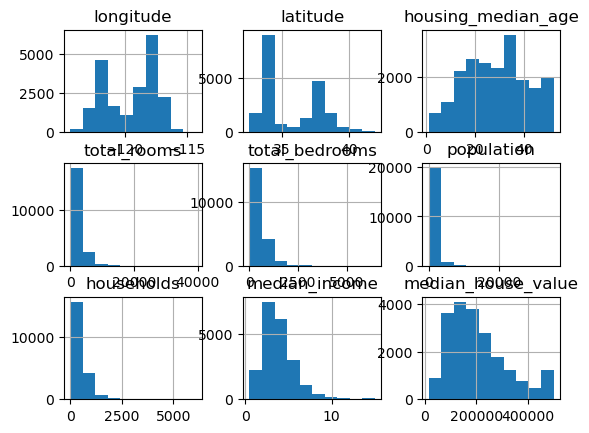

In [12]:
housing.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

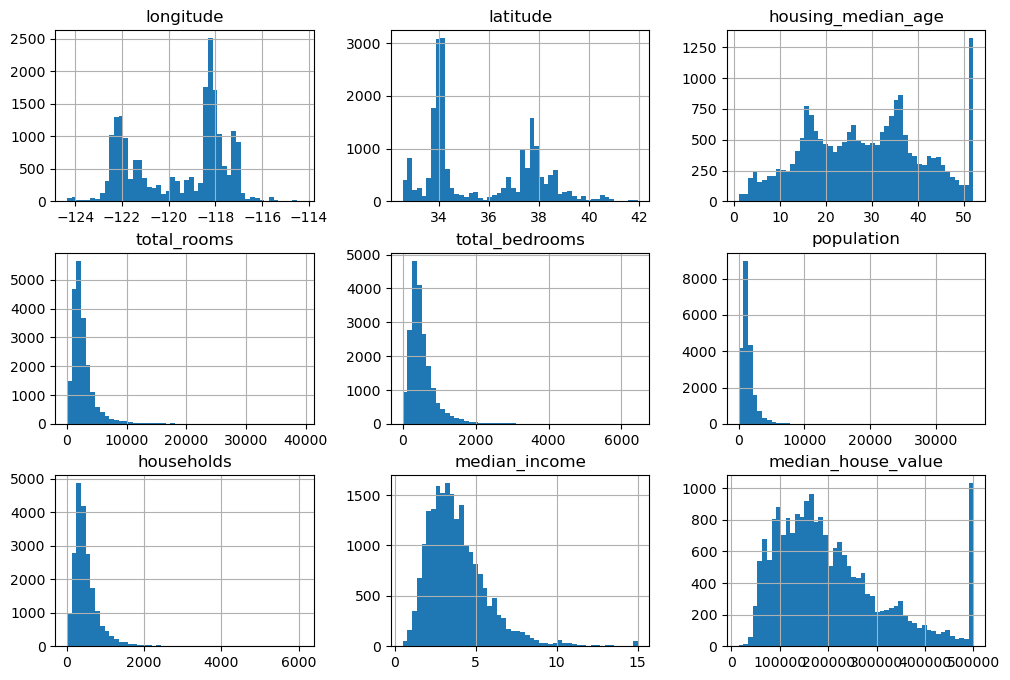

In [13]:
housing.hist(bins=50, figsize=(12, 8))

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Creating a test Set

In [16]:
import numpy as np

In [17]:
def shuffle_and_split_data(data, test_ratio):
    # Step 1: Generate a random permutation of indices based on the length of the dataset
    shuffled_indices = np.random.permutation(len(data))
    
    # Step 2: Calculate the number of test samples based on the specified test ratio
    test_set_size = int(len(data) * test_ratio)
    
    # Step 3: Select the indices for the test set from the shuffled indices
    test_indices = shuffled_indices[:test_set_size]
    
    # Step 4: Select the remaining indices for the training set
    train_indices = shuffled_indices[test_set_size:]
    
    # Step 5: Return the training and test sets by using the indices to index the original data
    return data.iloc[train_indices], data.iloc[test_indices]

In [18]:
# Step 1: Split the housing dataset into training and test sets
# The function shuffle_and_split_data will shuffle the data randomly and then 
# split it according to the given test_ratio (0.2 = 20% of the data goes to the test set)
train_set, test_set = shuffle_and_split_data(housing, 0.2)

# Step 2: Calculate the length (number of rows) of the training set
# len(train_set) will return the number of rows in the training set after the shuffle and split
# Since the test_ratio is 0.2, we expect 80% of the total rows to be in the training set
train_set_length = len(train_set)

In [19]:
len(test_set)

4128

In [20]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3700,-121.80,37.99,16.0,3077.0,465.0,1575.0,446.0,5.5000,179500.0,INLAND
11173,-122.31,40.47,26.0,2723.0,551.0,1326.0,547.0,2.3594,66000.0,INLAND
10908,-118.92,35.13,29.0,1297.0,262.0,909.0,253.0,1.9236,106300.0,INLAND
4915,-118.21,34.11,32.0,2759.0,499.0,1661.0,533.0,4.3812,228200.0,<1H OCEAN
1988,-119.77,36.75,44.0,1818.0,412.0,1680.0,418.0,1.7083,48300.0,INLAND


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

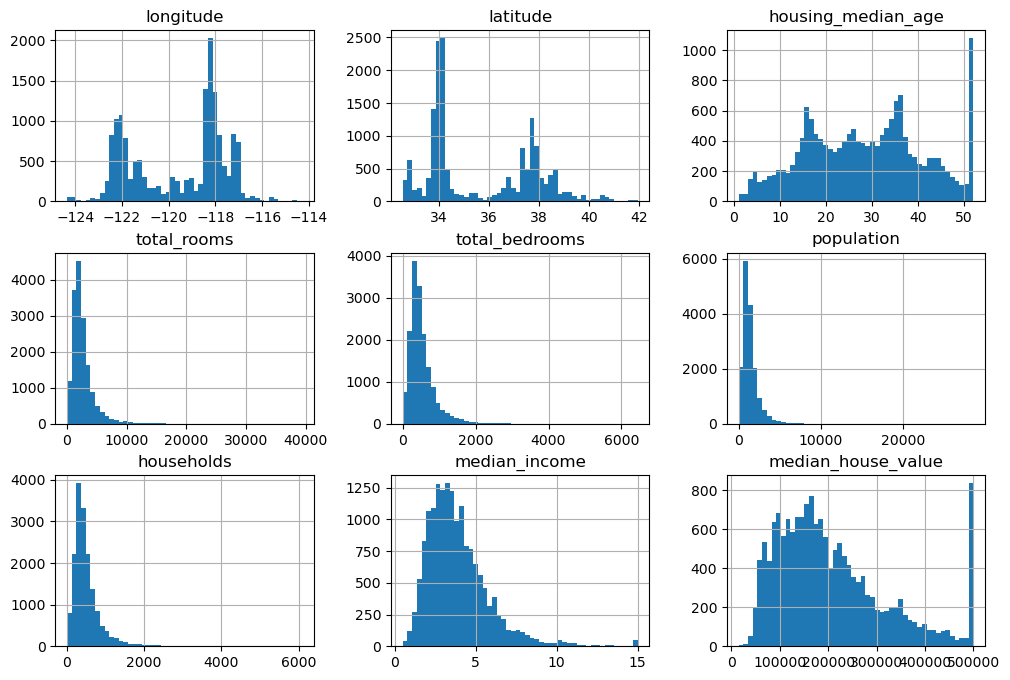

In [21]:
train_set.hist(bins=50, figsize=(12, 8))

In [22]:
test_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4128.000000,4128.000000,4128.000000,4128.000000,4080.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,-119.540901,35.596536,28.503876,2584.906492,528.391176,1404.575581,491.215601,3.832366,204166.588421
std,1.988439,2.126602,12.504518,2025.097797,394.228112,1142.550104,362.317229,1.809200,113358.378158
min,-124.250000,32.550000,2.000000,16.000000,4.000000,8.000000,3.000000,0.499900,22500.000000
25%,-121.750000,33.930000,18.000000,1436.750000,295.000000,792.000000,277.000000,2.560750,118375.000000
50%,-118.470000,34.250000,29.000000,2124.500000,433.500000,1155.500000,408.000000,3.540050,177950.000000
75%,-118.000000,37.710000,37.000000,3114.000000,642.250000,1703.000000,602.000000,4.711850,261450.000000
max,-114.560000,41.800000,52.000000,25135.000000,4819.000000,35682.000000,4769.000000,15.000100,500001.000000


In [23]:
# Importing the crc32 function from the zlib module, which computes a CRC32 checksum (a 32-bit hash) for given data.
from zlib import crc32

In [24]:
def is_id_in_test_set(identifier, test_ratio):
    # The function checks whether an identifier should belong to the test set based on its hash value.
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    # Extract the column that contains the identifiers
    ids = data[id_column]
    
    # Apply the 'is_id_in_test_set' function to each identifier
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    
    # Split the data into test and training sets based on the 'in_test_set' boolean values
    return data.loc[~in_test_set], data.loc[in_test_set]

In [25]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2,
"index")


In [26]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [27]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2,
"id")

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

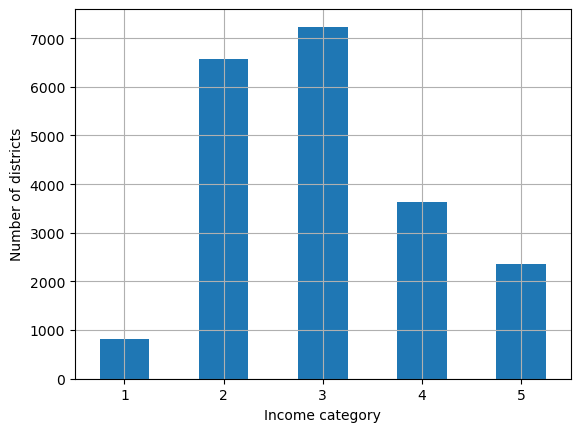

In [30]:
# Creating a new category column 'income_cat' based on 'median_income'
# The 'pd.cut' function divides the 'median_income' values into discrete intervals (bins)
# Note that 'bins' defines the edges of these intervals, and 'labels' assigns categories to each interval.

housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],  # Defines the income intervals
                               labels=[1, 2, 3, 4, 5])  # Assigns labels to each income interval

# Display the frequency of each income category in the 'income_cat' column
# 'value_counts()' counts the occurrences of each category, and 'sort_index()' orders the result by category
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)

# Adding labels and title for the bar chart
plt.xlabel("Income category")  # X-axis label
plt.ylabel("Number of districts")  # Y-axis label
plt.show()  # Display the plot


In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

In [32]:
# Initialize the StratifiedShuffleSplit object
# n_splits=10 means we want to generate 10 different train-test splits
# test_size=0.2 means 20% of the data will be used for the test set, and 80% for the training set
# random_state=42 ensures that the splits are reproducible (same split every time)
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Initialize an empty list to store the stratified splits (train and test sets)
strat_splits = []

# Iterate over the splits generated by StratifiedShuffleSplit
# `train_index` and `test_index` are the indices of the training and test sets, respectively
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    # Using .loc to select the rows corresponding to the test set (based on test_index)
    strat_train_set_n = housing.loc[train_index]  # select training set rows
    strat_test_set_n = housing.loc[test_index]  # Select test set rows
    
    # Append the current train-test split (each pair of train and test sets) to the strat_splits list
    strat_splits.append([strat_train_set_n, strat_test_set_n])

# After all splits are done, extract the first train-test pair from the strat_splits list
# This gives you the training and testing sets for the first split
strat_train_set, strat_test_set = strat_splits[0]

In [33]:
print(strat_train_set.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   

       population  households  median_income  median_house_value  \
13096      1576.0      1034.0         2.0987            458300.0   
14973       666.0       357.0         6.0876            483800.0   
3785        562.0       203.0         2.4330            101700.0   
14689      1845.0       780.0         2.2618             96100.0   
20507      1912.0      1172.0         3.5292            361800.0   

      ocean_proximity income_cat  
13096        NEAR BAY          2  
14973       <1H OCEAN          5  
3785       

In [34]:
print(strat_test_set.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
3905     -121.95     37.11                21.0       2387.0           357.0   
16821    -118.01     33.89                36.0       1589.0           265.0   
2900     -118.18     33.74                30.0       5915.0          1750.0   
7193     -122.48     37.74                52.0       2166.0           423.0   
13928    -122.39     37.78                 5.0       1405.0           515.0   

       population  households  median_income  median_house_value  \
3905        913.0       341.0         7.7360            397700.0   
16821       804.0       272.0         4.6354            202900.0   
2900       2136.0      1503.0         4.0968            310000.0   
7193       1072.0       370.0         4.1310            314300.0   
13928       725.0       392.0         3.6037            187500.0   

      ocean_proximity income_cat  
3905        <1H OCEAN          5  
16821       <1H OCEAN          4  
2900       

In [35]:
# Split the 'housing' dataset into training and test sets using train_test_split
# - 'test_size=0.2' means 20% of the data will be used for the test set and 80% for training
# - 'stratify=housing["income_cat"]' ensures the 'income_cat' column's class distribution is preserved in both sets
# - 'random_state=42' ensures that the split is reproducible (same split each time)
strat_train_set, strat_test_set = train_test_split(
    housing,                # The dataset to split
    test_size=0.2,          # Proportion of the data to be used as the test set (20%)
    stratify=housing["income_cat"],  # Ensures the 'income_cat' class distribution is preserved in both train and test sets
    random_state=42         # Ensures reproducibility (same split every time)
)


In [73]:
# Count the occurrences of each unique value in the "income_cat" column
# and then divide by the total number of rows in the DataFrame to get the proportion
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64